In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("Alphabets_data.csv")

# Basic information
print("Shape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
df.describe(include='all')


Shape of dataset: (20000, 17)

Data Types:
 letter    object
xbox       int64
ybox       int64
width      int64
height     int64
onpix      int64
xbar       int64
ybar       int64
x2bar      int64
y2bar      int64
xybar      int64
x2ybar     int64
xy2bar     int64
xedge      int64
xedgey     int64
yedge      int64
yedgex     int64
dtype: object

Missing values:
 letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64


,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
unique,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,NaN,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,NaN,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,NaN,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,NaN,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Separate features and target
X = df.drop("letter", axis=1)
y = df["letter"]

# 2. Label encode the target (A-Z → 0-25)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 3. Normalize feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Confirm dimensions
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((16000, 16), (4000, 16), (16000,), (4000,))

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# One-hot encode the target labels
y_train_cat = to_categorical(y_train, num_classes=26)
y_test_cat = to_categorical(y_test, num_classes=26)

# Build the model
model = Sequential([
    Dense(64, input_dim=16, activation='relu'),
    Dense(26, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_cat,
                    epochs=60,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)


Epoch 1/60
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2635 - loss: 2.7309 - val_accuracy: 0.6616 - val_loss: 1.3772
Epoch 2/60
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6693 - loss: 1.2497 - val_accuracy: 0.7484 - val_loss: 0.9678
Epoch 3/60
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7611 - loss: 0.9060 - val_accuracy: 0.7962 - val_loss: 0.8022
Epoch 4/60
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7866 - loss: 0.7916 - val_accuracy: 0.8197 - val_loss: 0.7071
Epoch 5/60
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8115 - loss: 0.6859 - val_accuracy: 0.8344 - val_loss: 0.6421
Epoch 6/60
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8339 - loss: 0.6108 - val_accuracy: 0.8462 - val_loss: 0.5926
Epoch 7/60
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8400 - loss: 0.5636 - val_accuracy: 0.8506 - val_loss: 0.5566
Epoch 8/60
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8561 - loss: 0.5233 - val_accuracy: 0.

Step 3: Hyperparameter Tuning

 Objective

Improve model performance by experimenting with:

Number of hidden layers

Neurons per layer

Activation functions

Optimizers and learning rates

Batch size & epochs

 3.1 Method:
 RandomizedSearchCV with KerasClassifier
We'll use RandomizedSearchCV from scikit-learn combined with KerasClassifier (a wrapper from tensorflow.keras.wrappers.scikit_learn) to automate this process.

In [8]:
!pip install scikeras


In [19]:
# STEP 2: Import correct modules
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [20]:
# STEP 3: Define model-building function
def build_model(hidden_units=64, activation='relu', optimizer='adam'):
    model = Sequential([
        Dense(hidden_units, input_dim=16, activation=activation),
        Dense(26, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [21]:
# STEP 4: Wrap model with SciKerasClassifier
model = KerasClassifier(model=build_model, verbose=0)


In [22]:
# STEP 5: Define hyperparameter grid
param_dist = {
    'model__hidden_units': [32, 64, 128],
    'model__activation': ['relu', 'tanh'],
    'model__optimizer': ['adam', 'sgd'],
    'batch_size': [16, 32],
    'epochs': [10, 20]
}


In [26]:
def build_model(hidden_units=64, activation='relu', optimizer='adam'):
    model = Sequential([
        Dense(hidden_units, input_dim=16, activation=activation),
        Dense(26, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [27]:
# Wrap model with SciKerasClassifier
model = KerasClassifier(model=build_model, verbose=0)

# Randomized search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=5,
    cv=3,
    verbose=1,
    n_jobs=-1
)

**Reasoning**:
Fit the RandomizedSearchCV object to the training data.




✅ Test Accuracy: 0.9390
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Report:
              precision    recall  f1-score   support

           A       0.97      0.97      0.97       158
           B       0.93      0.86      0.89       153
           C       0.94      0.99      0.96       147
           D       0.94      0.93      0.94       161
           E       0.89      0.97      0.93       154
           F       1.00      0.83      0.91       155
           G       0.95      0.90      0.92       155
           H       0.95      0.82      0.88       147
           I       0.98      0.86      0.92       151
           J       0.92      0.97      0.94       149
           K       0.94      0.95      0.94       148
           L       0.95      0.95      0.95       152
           M       0.97      0.99      0.98       158
           N       0.95      0.90      0.93       157
           O       0.96      0.93      0.94       150
           P       0.89      0.99      0.94  

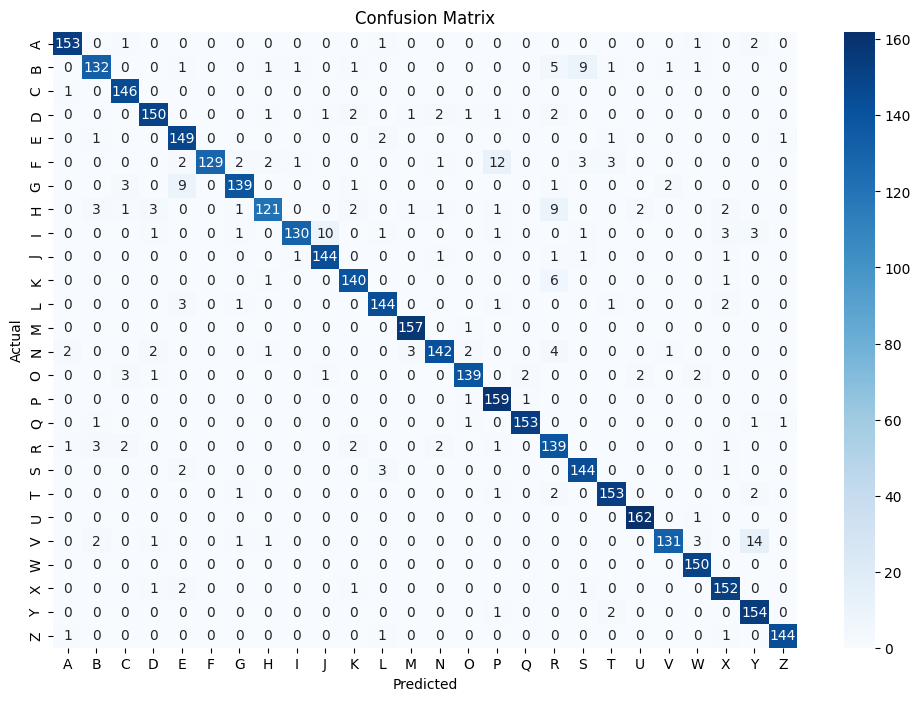

In [40]:

# STEP 6: EVALUATION
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# STEP 7: CLASSIFICATION REPORT
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# STEP 8: CONFUSION MATRIX
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


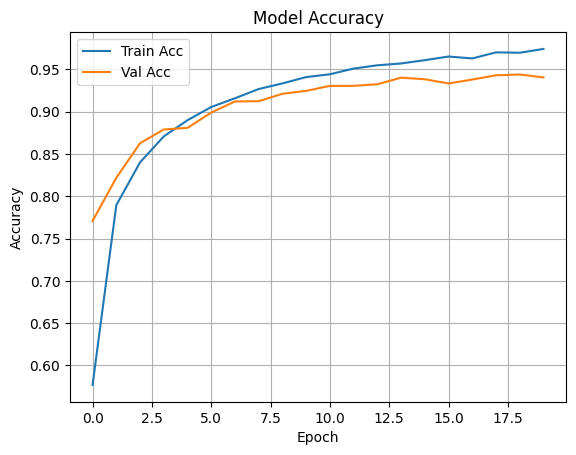

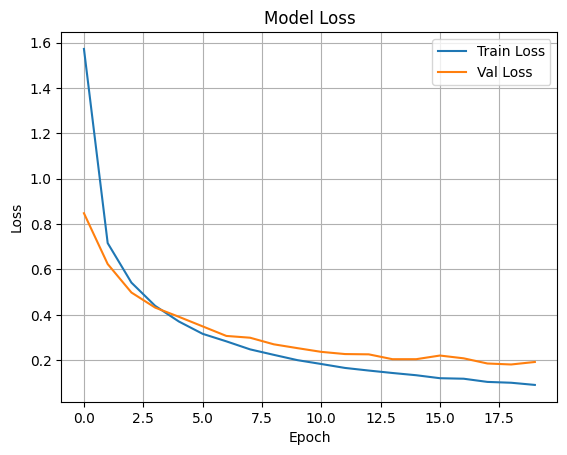

In [39]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
